<a href="https://colab.research.google.com/github/zachmakki15/ADVDS/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the needed libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

dataFrame = pd.read_csv("https://raw.githubusercontent.com/zachmakki15/ADVDS/main/epi_r.csv");
dataFrame.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,anthony bourdain,caviar,iced coffee,iced tea,pressure cooker,valentine's day
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.00000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000100,0.000050,0.000100,0.000898,0.000399,0.01162
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.009987,0.007062,0.009987,0.029948,0.019971,0.10717
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Lets look at the features/attributes of this dataset

In [ ]:
#Display top of table
dataFrame.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,anthony bourdain,caviar,iced coffee,iced tea,pressure cooker,valentine's day
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,0,0,0,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Show table info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  20052 non-null  object 
 1   rating                 20052 non-null  float64
 2   calories               15935 non-null  float64
 3   protein                15890 non-null  float64
 4   fat                    15869 non-null  float64
 5   sodium                 15933 non-null  float64
 6   #cakeweek              20052 non-null  int64  
 7   #wasteless             20052 non-null  int64  
 8   22-minute meals        20052 non-null  int64  
 9   3-ingredient recipes   20052 non-null  int64  
 10  30 days of groceries   20052 non-null  int64  
 11  advance prep required  20052 non-null  int64  
 12  anthony bourdain       20052 non-null  int64  
 13  caviar                 20052 non-null  int64  
 14  iced coffee            20052 non-null  int64  
 15  ic

In [ ]:
#Lets examine the one non-numeric column, title
dataFrame['title'].value_counts()

Pastry Dough                                   28
Chicken Stock                                  26
Turkey Giblet Stock                            20
Turkey Stock                                   15
Simple Syrup                                   13
                                               ..
Fruity Lemonade Ice Pops                        1
Szechwan-Style Eggplant with Pita Wedges        1
Poached Eggs with Tomato Cilantro Sauce         1
Greens and Grains Scramble                      1
Baked Ham with Marmalade-Horseradish Glaze      1
Name: title, Length: 17736, dtype: int64

From examining the data it seems we only need to create histograms for the continuous data columns, calories, protient, fat and sodium

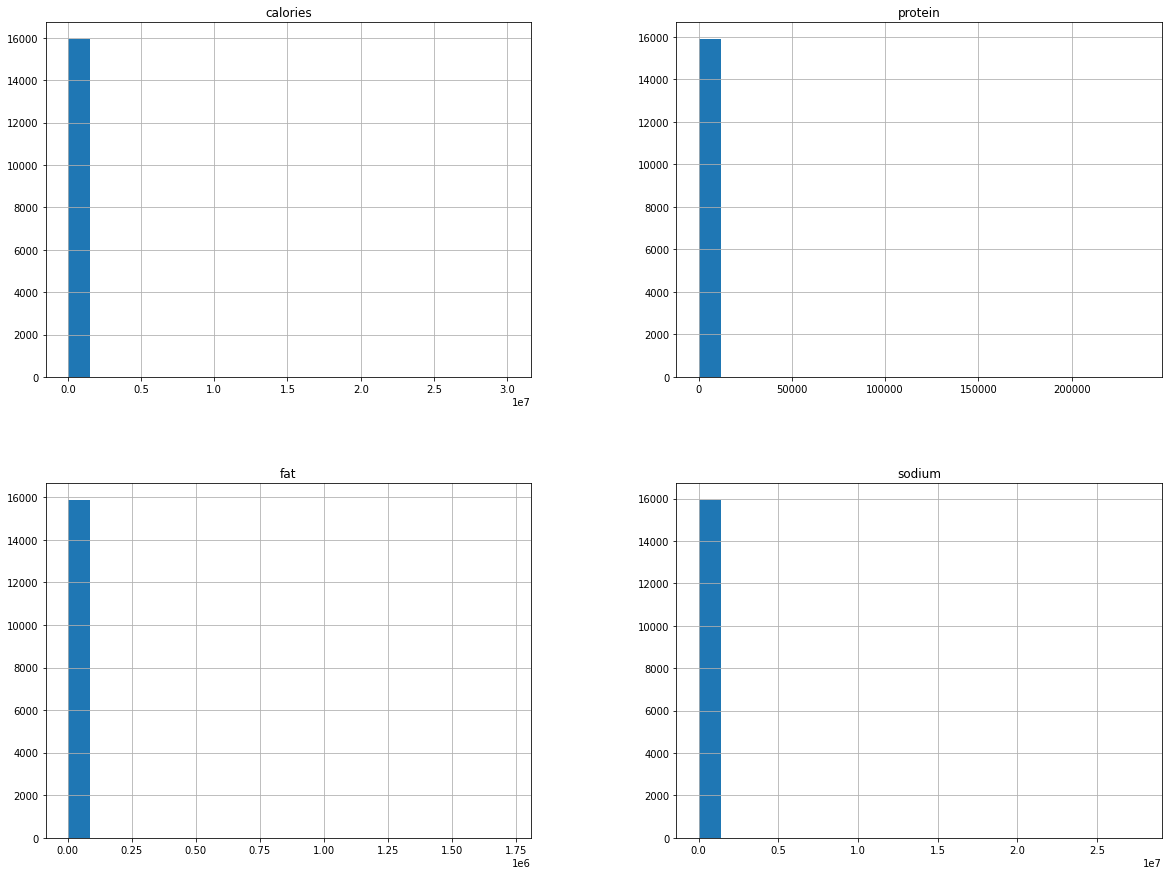

In [ ]:
dataFrame.hist(column=['calories','protein','fat','sodium'], bins=20, figsize=(20,15))
plt.show()

The histograms are showing weird results for calories, protein, fat, and sodium

Lets remove all duplicate values and replace all missing values with the mean value for their respective column

In [ ]:
#Drop all duplicate titles
dataFrame.drop_duplicates(subset="title",keep=False,inplace=True)

In [ ]:
#Show updated datset info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15833 entries, 0 to 20051
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  15833 non-null  object 
 1   rating                 15833 non-null  float64
 2   calories               12550 non-null  float64
 3   protein                12534 non-null  float64
 4   fat                    12517 non-null  float64
 5   sodium                 12550 non-null  float64
 6   #cakeweek              15833 non-null  int64  
 7   #wasteless             15833 non-null  int64  
 8   22-minute meals        15833 non-null  int64  
 9   3-ingredient recipes   15833 non-null  int64  
 10  30 days of groceries   15833 non-null  int64  
 11  advance prep required  15833 non-null  int64  
 12  anthony bourdain       15833 non-null  int64  
 13  caviar                 15833 non-null  int64  
 14  iced coffee            15833 non-null  int64  
 15  ic

In [ ]:
#Show updated value counts
dataFrame['title'].value_counts()

Lentil, Apple, and Turkey Wrap                                1
Olive Oil-Baked Beet Chips With Sea Salt And Black Pepper     1
Campanelle with White Beans, Lemon, and Burrata               1
Green-Curry Chicken with Peas and Basil                       1
Paad Thai                                                     1
                                                             ..
Peppery Fig and Cider Compote                                 1
Bacon and Cabbage Soup                                        1
Lamb with Peas and Tomatoes                                   1
Cranberry Crunch Salad                                        1
Baked Ham with Marmalade-Horseradish Glaze                    1
Name: title, Length: 15833, dtype: int64

Now all duplicate titles have been dropped and there is only one recipe per title in the dataset

Now lets replace all the missing values using the sklearn simple imputer

In [ ]:
#Import sklearn simple imputer and pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

dataFrame_cont = dataFrame[['calories', 'protein', 'fat', 'sodium']]
imputer.fit(dataFrame_cont)
dataFrame_cont_arr = imputer.transform(dataFrame_cont)
dataFrame_cont_tr = pd.DataFrame(dataFrame_cont_arr, columns=dataFrame_cont.columns, index=dataFrame_cont.index)
dataFrame_cont_tr = np.log10(dataFrame_cont_tr + 1)
dataFrame_cont_tr.head()

,calories,protein,fat,sodium
0,2.630428,1.491362,0.903090,2.748188
1,2.606381,1.278754,1.380211,3.158362
2,2.220108,0.845098,0.903090,2.220108
3,3.860978,1.936145,2.601506,3.861289
4,2.738781,1.322219,1.518514,2.656098


All continuous columns have been normalized and had their missing values replaced with the respective column mean, now lets look at the histograms again 

In [ ]:
dataFrame_cont_tr.describe()

,calories,protein,fat,sodium
count,15833.000000,15833.000000,15833.000000,15833.000000
mean,2.830175,1.254465,1.524821,2.692338
std,0.632391,0.591290,0.723165,0.882826
min,0.000000,0.000000,0.000000,0.000000
25%,2.406540,0.778151,1.113943,2.176091
50%,2.687529,1.278754,1.431364,2.705008
75%,3.110926,1.886491,1.944483,3.301247
max,7.478728,5.303129,6.236226,7.442089


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f917f9fdd50>,
      dtype=object)

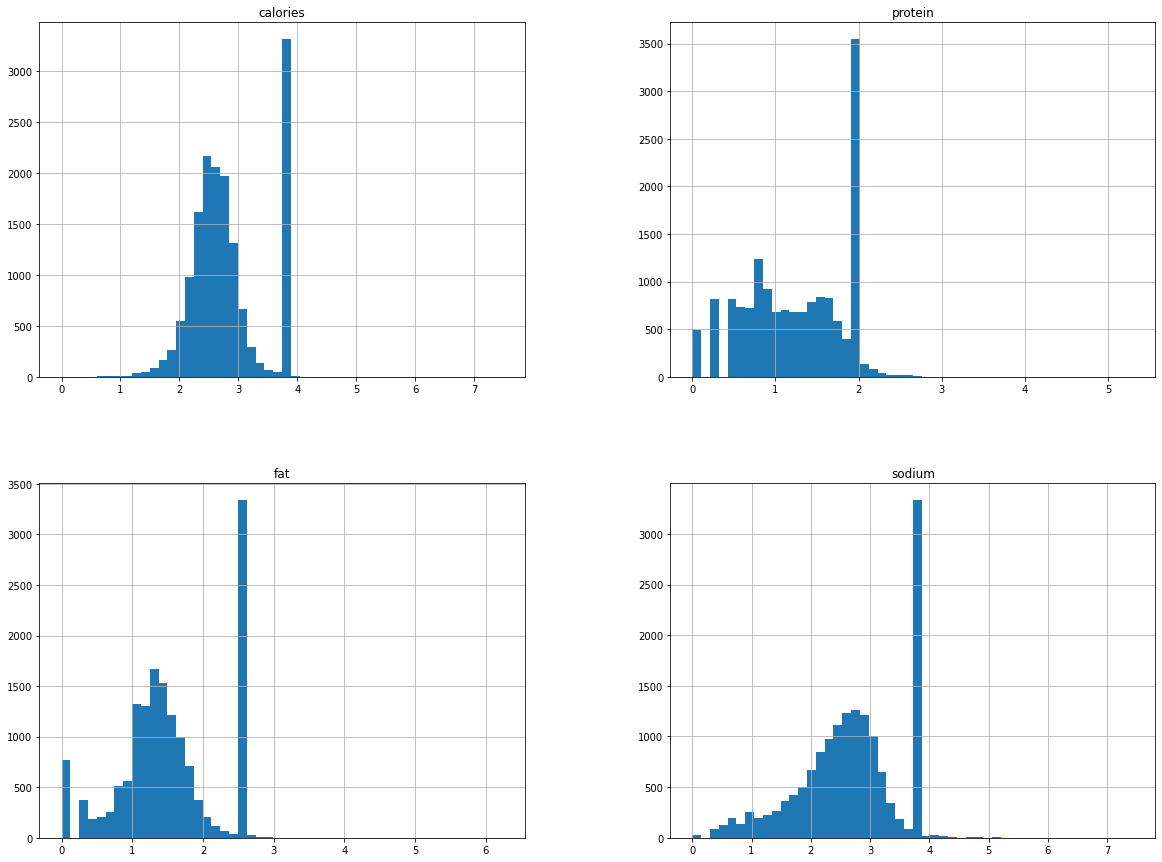

In [ ]:
dataFrame_cont_tr.hist(bins=50, figsize=(20,15))

These histograms now look much cleaner then they did before the columns were normalized using log(x+1)

Now lets add the rating column to our numeric dataFrame and calculate Pearsons R correlation between the numeric columns (calories, protein, fat, sodium)

In [ ]:
dataFrame_cont_tr['rating'] = dataFrame['rating']
corr_matrix = dataFrame_cont_tr.corr()
 
corr_matrix["rating"].sort_values(ascending=False)

rating      1.000000
protein     0.093521
sodium      0.075710
fat         0.058590
calories    0.015062
Name: rating, dtype: float64

The correlation for each numeric column to rating is relativly low. Lets now put all our data back into a final dataFrame and show scatter plots for the relationships between calories and rating, protein and rating, sodium and rating, and fat and rating

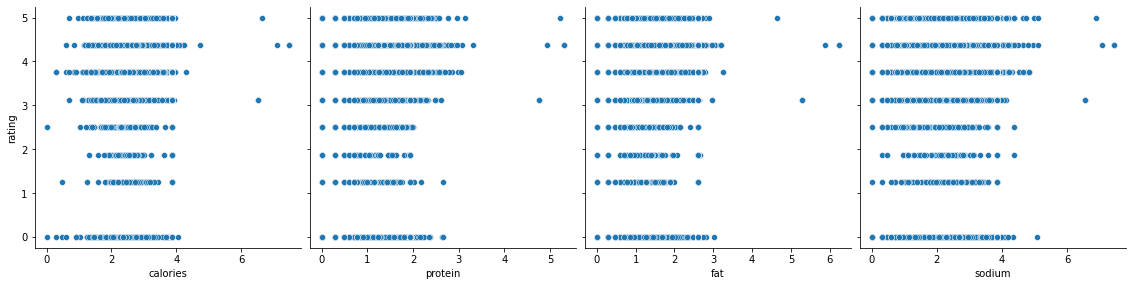

In [ ]:
dataFrame['protein'] = dataFrame_cont_tr['protein']
dataFrame['calories'] = dataFrame_cont_tr['calories']
dataFrame['fat'] = dataFrame_cont_tr['fat']
dataFrame['sodium'] = dataFrame_cont_tr['sodium']
sns.pairplot(dataFrame, x_vars=['calories', 'protein', 'fat', 'sodium'], y_vars=['rating'], height=4, aspect=1, kind='scatter')
plt.show();

Since our Pearson correlation is low and the scatter plots are not showing us any linear relationship lets do PCA on the dimensions we have in our dataset

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
dataFrame_pca = dataFrame.drop(columns=['title'])
pca.fit(dataFrame_pca)
cumlativeSum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumlativeSum >= 0.95) + 1
pca = PCA(n_components = d)
pca_tr = pca.fit_transform(dataFrame_pca)

Lets examine the results from PCA

In [ ]:
print ('Scaled data shape: ', dataFrame_pca)
print ('Transformed data shape: ', pca_tr.shape)
print ('Explained variance by n components: ', pca.explained_variance_ratio_)
print ('#Components explaining 95% of variance: ', d)

Scaled data shape:         rating  calories   protein  ...  iced tea  pressure cooker  valentine's day
0       2.500  2.630428  1.491362  ...         0                0                0
1       4.375  2.606381  1.278754  ...         0                0                0
2       3.750  2.220108  0.845098  ...         0                0                0
3       5.000  3.860978  1.936145  ...         0                0                0
4       3.125  2.738781  1.322219  ...         0                0                0
...       ...       ...       ...  ...       ...              ...              ...
20046   3.750  2.999565  1.748188  ...         0                0                0
20048   4.375  2.827369  1.361728  ...         0                0                0
20049   4.375  2.751279  1.505150  ...         0                0                0
20050   4.375  2.800717  1.662758  ...         0                0                0
20051   4.375  2.748963  1.869232  ...         0                0  

Now lets plot the elbow chart

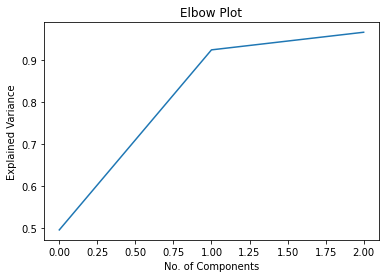

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

We have scaled the data and performed PCA, it is now time to feed the scaled data into a logisitc regression model

Logistic models will be created for multiple recipe types, the first will be #cakeweek

#Cakeweek Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#First test is #cakeweek
x = dataFrame_cont_arr
y = dataFrame['#cakeweek']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 100)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 4)
#Training and testing cases (11083, 4) (4750, 4)
Confusion matrix:


,0,1
0,4748,0
1,2,0


In the test cases it appears none of the recipes in the randomized test data were cake week recipes, which makes sense as only 5 total recipes in the dataset are cake week recipes

#Wasteless Test

In [ ]:
#Second test is #wasteless
x = dataFrame_cont_arr
y = dataFrame['#wasteless']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 100)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 4)
#Training and testing cases (11083, 4) (4750, 4)
Confusion matrix:


,0,1
0,4750,0
1,0,0


This also seems as though there were 0 recipes in the test data that are wasteless recipes, which also makes sense as there is only 1 wasteless recipe in the entire dataset

#22-minute meals Test

In [ ]:
x = dataFrame_cont_arr
y = dataFrame['22-minute meals']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 10)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)


#Total cases (15833, 4)
#Training and testing cases (11083, 4) (4750, 4)
Confusion matrix:


,0,1
0,4748,0
1,2,0


Here I had to lower the random state parameter in the train test split to prevent the model from failing to converge

#3-ingredient recipes Test

In [ ]:
x = dataFrame_cont_arr
y = dataFrame['3-ingredient recipes']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 100)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 4)
#Training and testing cases (11083, 4) (4750, 4)
Confusion matrix:


,0,1
0,4745,0
1,5,0


The models were never able to pick up on any of the recipes as all of the data is very sprase. We will now add another column to the dataset called healthy. 

In [ ]:
#Add new column healthy
healthyList = []
for row in dataFrame.index:
  highCal = 0
  highSod = 0;
  highFat = 0;
  if (dataFrame['calories'][row] > dataFrame['calories'].mean()):
    highCal = 1
  if (dataFrame['sodium'][row] > dataFrame['sodium'].mean()):
    highSod = 1;
  if (dataFrame['fat'][row] > dataFrame['fat'].mean()):
    highFat = 1;
  isHealthy = highCal + highSod + highFat
  if (isHealthy >= 2):
    healthyList.append(0)
  else:
    healthyList.append(1)

len(healthyList)
dataFrame.insert(5, "Healthy", healthyList, True)
dataFrame.describe()

,rating,calories,protein,fat,Healthy,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,anthony bourdain,caviar,iced coffee,iced tea,pressure cooker,valentine's day
count,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.00000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000,15833.000000
mean,3.723828,2.830175,1.254465,1.524821,0.594202,2.692338,0.000379,0.000063,0.001074,0.001705,0.000442,0.00600,0.000126,0.000063,0.000126,0.001011,0.000379,0.012884
std,1.309980,0.632391,0.591290,0.723165,0.491061,0.882826,0.019464,0.007947,0.032751,0.041261,0.021023,0.07723,0.011239,0.007947,0.011239,0.031774,0.019464,0.112780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.406540,0.778151,1.113943,0.000000,2.176091,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,2.687529,1.278754,1.431364,1.000000,2.705008,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,3.110926,1.886491,1.944483,1.000000,3.301247,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.478728,5.303129,6.236226,1.000000,7.442089,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The new column healthy has now been added to the dataset, lets see if this new column is at all correlated to rating

In [ ]:
corr_matrix = dataFrame.corr()
corr_matrix["rating"].sort_values(ascending=False)

rating                   1.000000
protein                  0.093521
sodium                   0.075710
fat                      0.058590
valentine's day          0.024995
calories                 0.015062
22-minute meals          0.012617
#wasteless               0.007743
30 days of groceries     0.007588
pressure cooker          0.005034
#cakeweek                0.003486
iced coffee              0.002906
anthony bourdain        -0.021227
iced tea                -0.022127
caviar                  -0.022593
Healthy                 -0.029459
advance prep required   -0.031225
3-ingredient recipes    -0.055412
Name: rating, dtype: float64

The new column healthy is not correlated to rating, lets run the regressions again and see if the new column made any difference there

#Cakeweek Test W/Healthy

In [115]:
new_col = np.reshape(healthyList, (len(healthyList), -1))
dataFrame_cont_healthy = np.append(dataFrame_cont_arr, new_col, 1)
#First test is #cakeweek
x = dataFrame_cont_healthy
y = dataFrame['#cakeweek']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 40)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 5)
#Training and testing cases (11083, 5) (4750, 5)
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,0,1
0,4747,1
1,2,0


#Wasteless Test W/Healthy

In [120]:
x = dataFrame_cont_healthy
y = dataFrame['#wasteless']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 100)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 5)
#Training and testing cases (11083, 5) (4750, 5)
Confusion matrix:


,0,1
0,4750,0
1,0,0


#22-minute meal Test W/Healthy

In [126]:
x = dataFrame_cont_healthy
y = dataFrame['22-minute meals']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 10)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 5)
#Training and testing cases (11083, 5) (4750, 5)
Confusion matrix:


,0,1
0,4748,0
1,2,0


#3-ingredient recipe Test W/Healthy

In [131]:
x = dataFrame_cont_healthy
y = dataFrame['3-ingredient recipes']

#Split the data into 70/30 train test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 10)
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

#Create labels and confusion matrix
isThisCake = [0,1]
confusionMatrix = confusion_matrix(yTest, yPred, labels=isThisCake)

#Print results
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=isThisCake, columns=isThisCake)

#Total cases (15833, 5)
#Training and testing cases (11083, 5) (4750, 5)
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,0,1
0,4743,0
1,7,0


Overall adding the new feature healthy did not improve the overall performance of the logistic regressions for #cakeweek, #wasteless, 22-minute meals, or 3-ingredient recipes. In fact it seemed to worsen performance as multiple tests failed to converge regardless of what the random state was set to.

In both the tests with and without healthy the model was able to accurately predict when a recipe was not the catoegory we were looking for, but when it was it was unable to do so. I believe this is because the data is so sparse, if the dataset had a higher number of total recipes which fell under each category I believe that the results of the logistic regression would then work better.